<h1>DENGUE</h1>
<h2>Analyst: Ramon Bernal</h2>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
dengue['Year'] = dengue['Year'].astype('int')

In [7]:
dengue.dtypes

Month            object
Year              int32
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1>INSIGHT 1-20 DENGUE</h1>

<h1>INSIGHT # 1</h1>

<h1>What year had the highest number of dengue cases?</h1>
<h2>Determine peak year</h2>

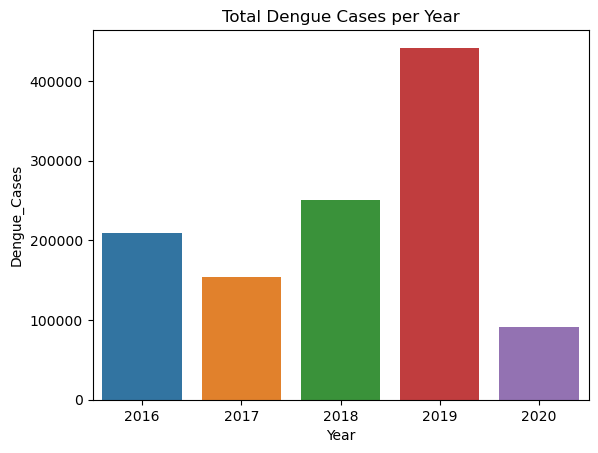

In [8]:
total_cases = dengue.groupby("Year")["Dengue_Cases"].sum().reset_index()
sns.barplot(data=total_cases, x="Year", y="Dengue_Cases")
plt.title("Total Dengue Cases per Year")
plt.show()


<h1>INSIGHT # 2</h1>

<h1>Which year had the highest fatality rate?</h1>
<h2>Use fatality rate and Dengue Deaths and Dengue Cases</h2>

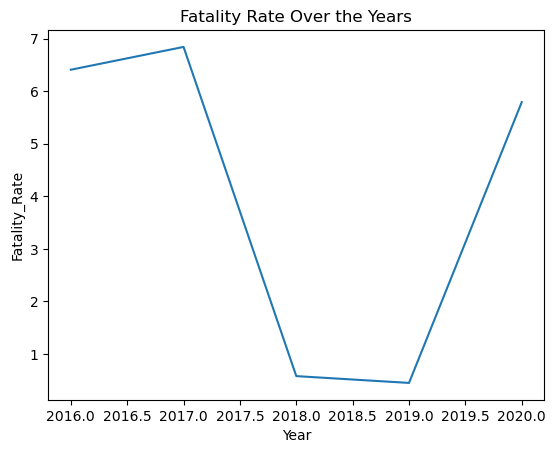

In [9]:
dengue["Fatality_Rate"] = dengue["Dengue_Deaths"] / dengue["Dengue_Cases"] * 100
fatality = dengue.groupby("Year")["Fatality_Rate"].mean().reset_index()
sns.lineplot(data=fatality, x="Year", y="Fatality_Rate")
plt.title("Fatality Rate Over the Years")
plt.show()


<h1>INSIGHT # 3</h1>

<h1>Which month consistently records the most cases across years?</h1>
<h2>Identify seasonal trend</h2>

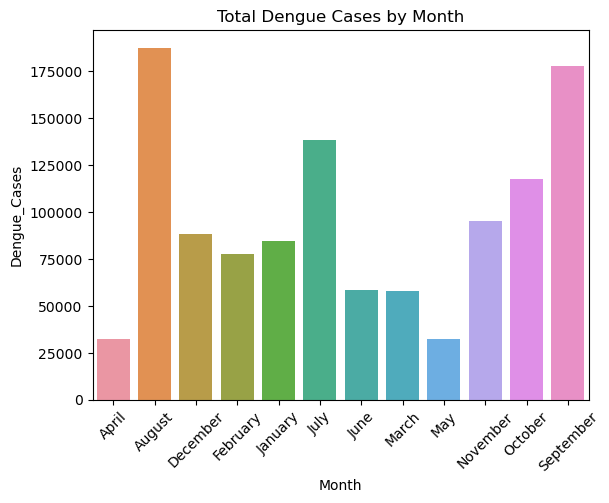

In [10]:
monthly = dengue.groupby("Month")["Dengue_Cases"].sum().reset_index()
sns.barplot(data=monthly, x="Month", y="Dengue_Cases")
plt.xticks(rotation=45)
plt.title("Total Dengue Cases by Month")
plt.show()


<h1>INSIGHT # 4</h1>

<h1>Which region has the highest average dengue cases</h1>


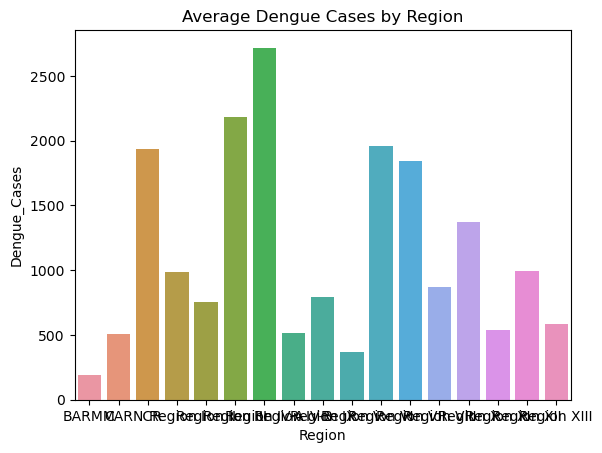

In [11]:
region_avg = dengue.groupby("Region")["Dengue_Cases"].mean().reset_index()
sns.barplot(data=region_avg, x="Region", y="Dengue_Cases")
plt.title("Average Dengue Cases by Region")
plt.show()


<h1>INSIGHT # 5</h1>

<h1>How do deaths correlate with dengue cases?</h1>

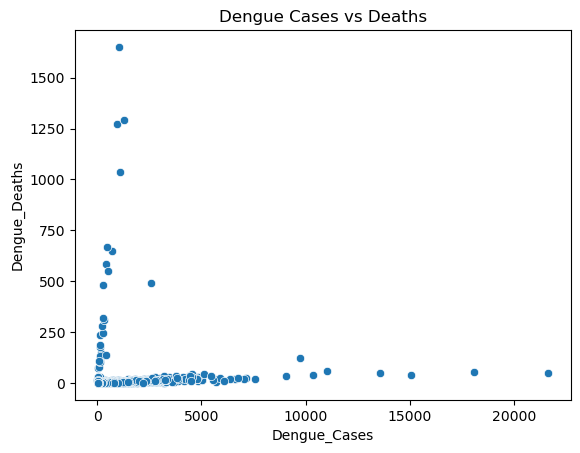

In [12]:
sns.scatterplot(data=dengue, x="Dengue_Cases", y="Dengue_Deaths")
plt.title("Dengue Cases vs Deaths")
plt.show()


<h1>INSIGHT # 6</h1>

<h1>Which year had the lowest fatality rate?</h1>

In [13]:
low_fatal = fatality.loc[fatality["Fatality_Rate"].idxmin()]
print(f"Lowest fatality rate was in {low_fatal['Year']:.0f}")


Lowest fatality rate was in 2019


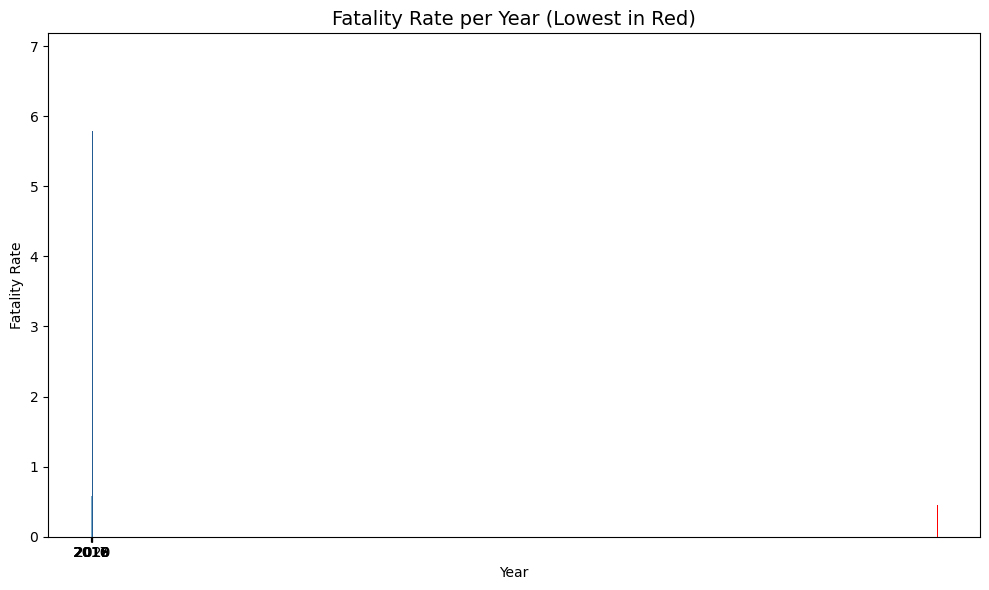

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=fatality, x='Year', y='Fatality_Rate', palette='Blues')
lowest_year = int(low_fatal['Year'])
lowest_rate = low_fatal['Fatality_Rate']
plt.bar(lowest_year, lowest_rate, color='red')
plt.title('Fatality Rate per Year (Lowest in Red)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Fatality Rate')
plt.tight_layout()
plt.show()

<h1>INSIGHT # 7</h1>

<h1>Which month has the highest fatality rate on average?</h1>

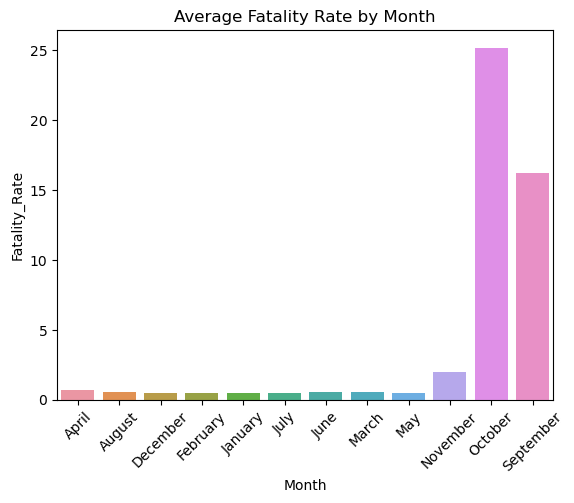

In [15]:
month_fatality = dengue.groupby("Month")["Fatality_Rate"].mean().reset_index()
sns.barplot(data=month_fatality, x="Month", y="Fatality_Rate")
plt.xticks(rotation=45)
plt.title("Average Fatality Rate by Month")
plt.show()


<h1>INSIGHT # 8</h1>

<h1>Trend of cases over time in the line plot?</h1>

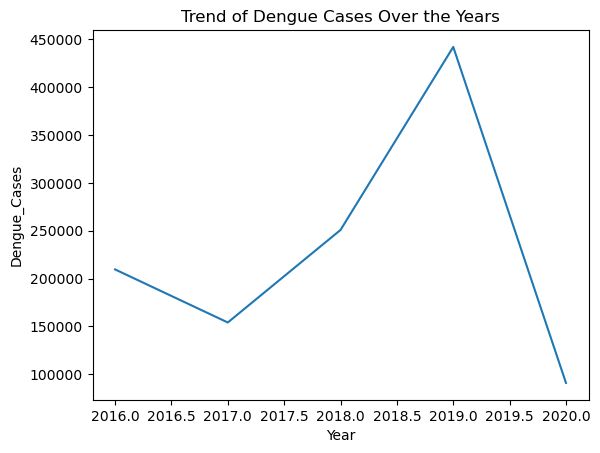

In [16]:
yearly_trend = dengue.groupby("Year")["Dengue_Cases"].sum().reset_index()
sns.lineplot(data=yearly_trend, x="Year", y="Dengue_Cases")
plt.title("Trend of Dengue Cases Over the Years")
plt.show()


<h1>INSIGHT # 9</h1>

<h1> Region with highest deaths in 2019?</h1>

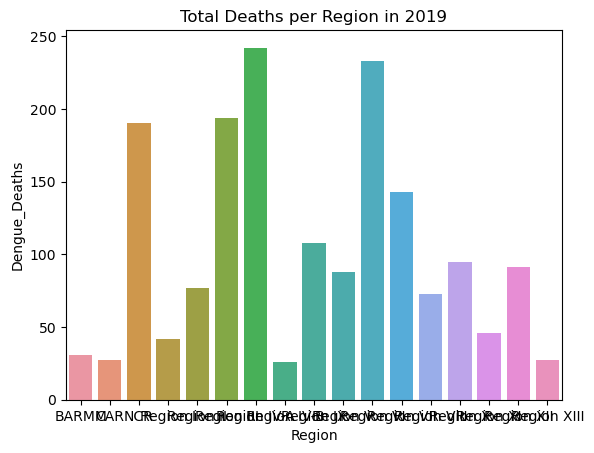

In [17]:
deaths_2019 = dengue[dengue["Year"] == 2019].groupby("Region")["Dengue_Deaths"].sum().reset_index()
sns.barplot(data=deaths_2019, x="Region", y="Dengue_Deaths")
plt.title("Total Deaths per Region in 2019")
plt.show()


<h1>INSIGHT # 10</h1>

<h1>Is there an increase or decrease trend in cases?</h1>
<h2>Based on linear regression trend.</h2>

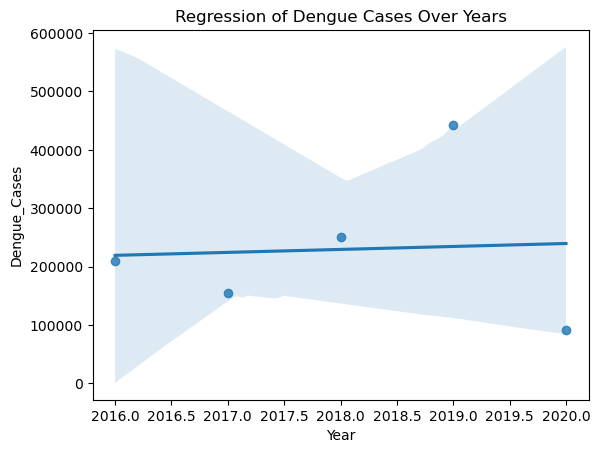

In [18]:
sns.regplot(data=yearly_trend, x="Year", y="Dengue_Cases")
plt.title("Regression of Dengue Cases Over Years")
plt.show()


<h1>INSIGHT # 11</h1>

<h1>Which region had zero deaths but high cases?</h1>

In [19]:
high_cases_zero_deaths = dengue[(dengue["Dengue_Deaths"] == 0) & (dengue["Dengue_Cases"] > 500)]
display(high_cases_zero_deaths)


,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Fatality_Rate
47,December,2019,Region I,819,0,0.0
55,August,2020,Region I,1030,0,0.0
58,November,2020,Region I,1212,0,0.0
67,August,2016,Region II,754,0,0.0
107,December,2019,Region II,581,0,0.0
123,April,2016,Region III,549,0,0.0
195,April,2017,Region IV-A,647,0,0.0
408,January,2020,Region VI,660,0,0.0
636,January,2019,Region X,1476,0,0.0
696,January,2019,Region XI,627,0,0.0


<h1>INSIGHT # 12</h1>

<h1>Fatality rate comparison per region?</h1>

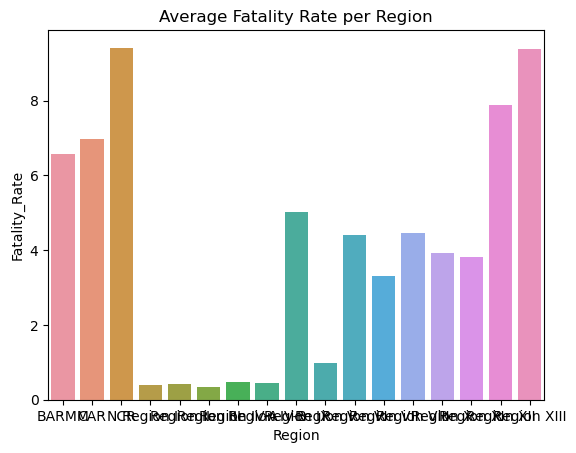

In [20]:
fatality_region = dengue.groupby("Region")["Fatality_Rate"].mean().reset_index()
sns.barplot(data=fatality_region, x="Region", y="Fatality_Rate")
plt.title("Average Fatality Rate per Region")
plt.show()


<h1>INSIGHT # 13</h1>

<h1>Which months show the sharpest rise in cases?</h1>

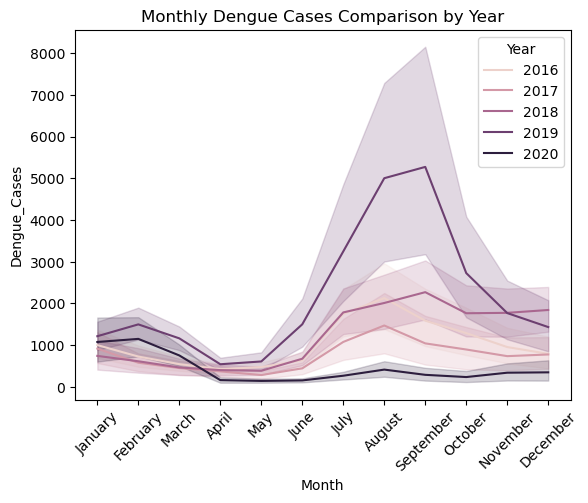

In [21]:
sns.lineplot(data=dengue, x="Month", y="Dengue_Cases", hue="Year")
plt.xticks(rotation=45)
plt.title("Monthly Dengue Cases Comparison by Year")
plt.show()


<h1>INSIGHT # 14</h1>

<h1> Top 5 months with the most deaths?</h1>

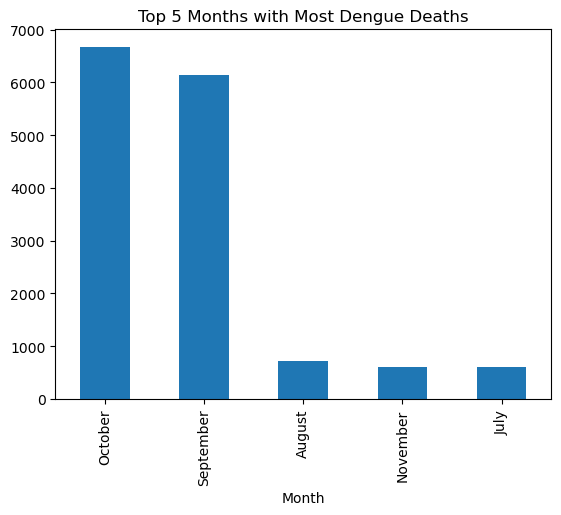

In [22]:
monthly_deaths = dengue.groupby("Month")["Dengue_Deaths"].sum().sort_values(ascending=False).head(5)
monthly_deaths.plot(kind="bar", title="Top 5 Months with Most Dengue Deaths")
plt.show()


<h1>INSIGHT # 15</h1>

<h1>Deaths-to-cases ratio per year?</h1>


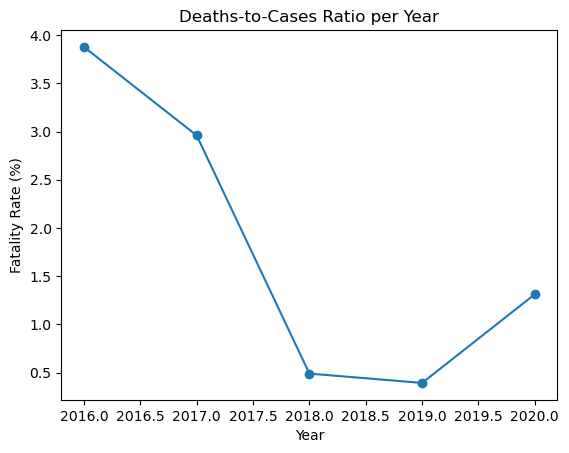

In [23]:
ratio = dengue.groupby("Year")[["Dengue_Deaths", "Dengue_Cases"]].sum()
ratio["Ratio"] = ratio["Dengue_Deaths"] / ratio["Dengue_Cases"] * 100
ratio["Ratio"].plot(kind="line", marker="o", title="Deaths-to-Cases Ratio per Year")
plt.ylabel("Fatality Rate (%)")
plt.show()


<h1>INSIGHT # 16</h1>

<h1> Boxplot of cases by year to see outliers</h1>

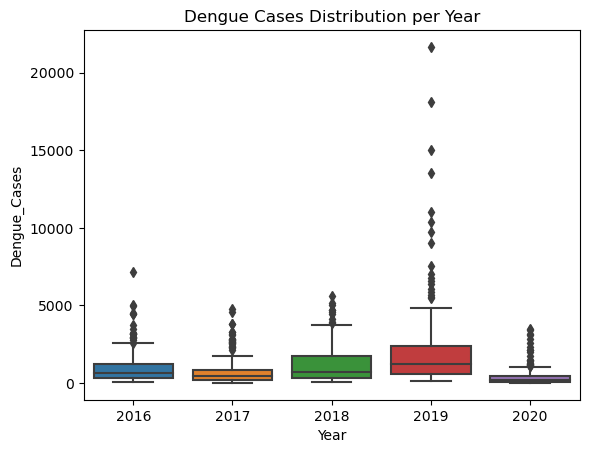

In [24]:
sns.boxplot(data=dengue, x="Year", y="Dengue_Cases")
plt.title("Dengue Cases Distribution per Year")
plt.show()


<h1>INSIGHT # 17</h1>

<h1>Heatmap of deaths by month and year</h1>


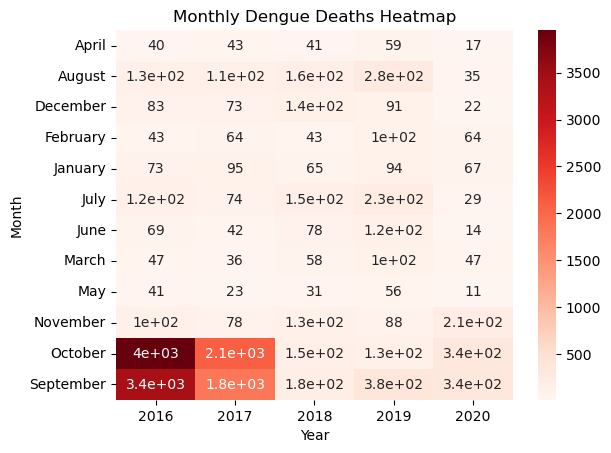

In [25]:
pivot = dengue.pivot_table(values="Dengue_Deaths", index="Month", columns="Year", aggfunc="sum")
sns.heatmap(pivot, cmap="Reds", annot=True)
plt.title("Monthly Dengue Deaths Heatmap")
plt.show()


<h1>INSIGHT # 18</h1>

<h1>Top 5 highest months month and year for dengue cases?</h1>

In [26]:
top5 = dengue.sort_values("Dengue_Cases", ascending=False).head(5)
print(top5[["Month", "Year", "Dengue_Cases"]])


         Month  Year  Dengue_Cases
224  September  2019         21658
403     August  2019         18090
223     August  2019         15047
402       July  2019         13564
884  September  2019         11033


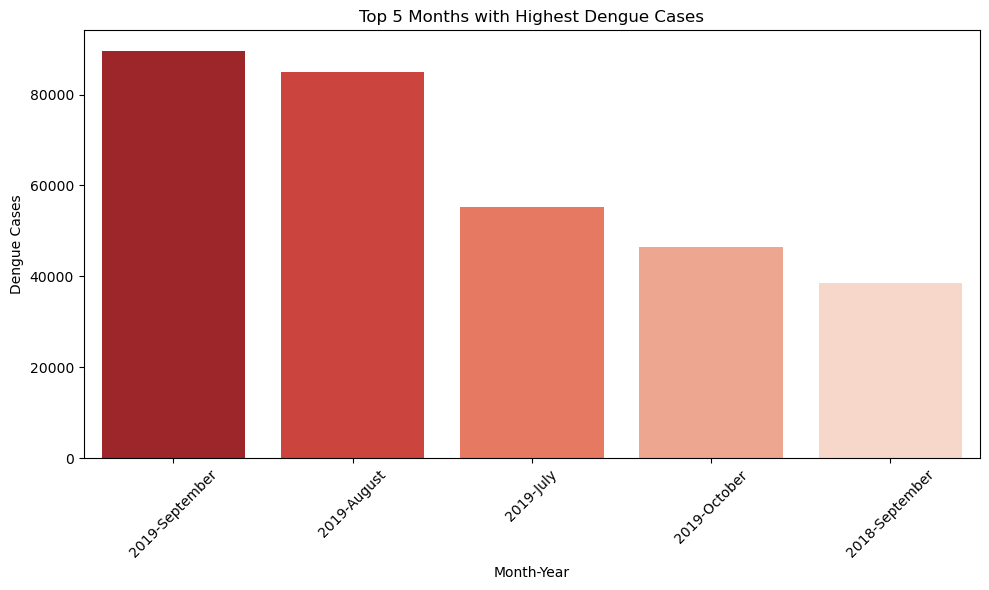

In [27]:
dengue['Month'] = dengue['Month'].astype(str)
dengue['Year_Month'] = dengue['Year'].astype(str) + '-' + dengue['Month']
monthly_cases = dengue.groupby('Year_Month')['Dengue_Cases'].sum().reset_index()
top5_months = monthly_cases.sort_values(by='Dengue_Cases', ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(data=top5_months, x='Year_Month', y='Dengue_Cases', palette='Reds_r')
plt.title('Top 5 Months with Highest Dengue Cases')
plt.xlabel('Month-Year')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>INSIGHT # 19</h1>

<h1>Do years with higher cases always have higher deaths?</h1>
<h2>Compare with correlation</h2>

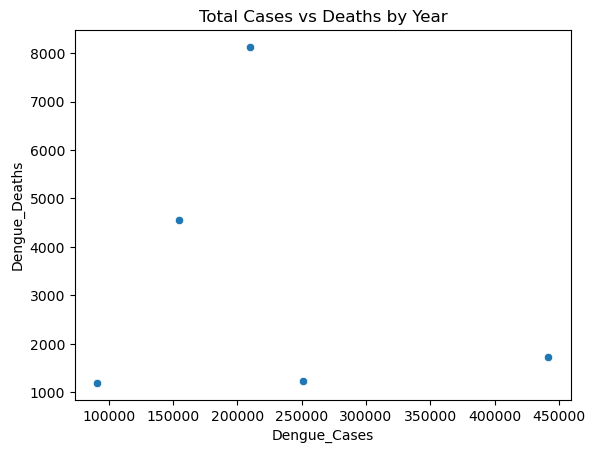

In [28]:
yearly = dengue.groupby("Year")[["Dengue_Cases", "Dengue_Deaths"]].sum().reset_index()
sns.scatterplot(data=yearly, x="Dengue_Cases", y="Dengue_Deaths")
plt.title("Total Cases vs Deaths by Year")
plt.show()


<h1>INSIGHT # 20</h1>

<h1>Compare fatality rates between early years 2016–2017 and recent years 2019–2020?</h1>

In [29]:
early = dengue[dengue["Year"].isin([2016, 2017])]["Fatality_Rate"].mean()
recent = dengue[dengue["Year"].isin([2019, 2020])]["Fatality_Rate"].mean()
print(f"Early Years Avg Fatality: {early:.2f}%")
print(f"Recent Years Avg Fatality: {recent:.2f}%")

Early Years Avg Fatality: 6.62%
Recent Years Avg Fatality: 3.12%


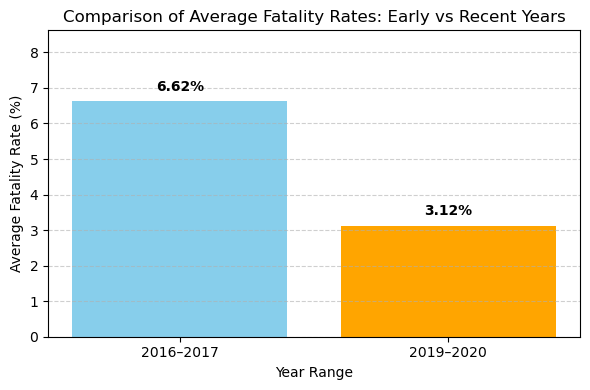

In [30]:

years = ['2016–2017', '2019–2020']
fatality_rates = [6.62, 3.12]
plt.figure(figsize=(6, 4))
plt.bar(years, fatality_rates, color=['skyblue', 'orange'])
plt.title('Comparison of Average Fatality Rates: Early vs Recent Years')
plt.ylabel('Average Fatality Rate (%)')
plt.xlabel('Year Range')
plt.ylim(0, max(fatality_rates) + 2)
for i, rate in enumerate(fatality_rates):
    plt.text(i, rate + 0.3, f'{rate:.2f}%', ha='center', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



<h1>INSIGHT # 21</h1>

<h1>Which region had the highest average number of dengue deaths from 2016 to 2020?</h1>
<h2>To determine this we compute the average dengue deaths per region and find the one with the highest value</h2>

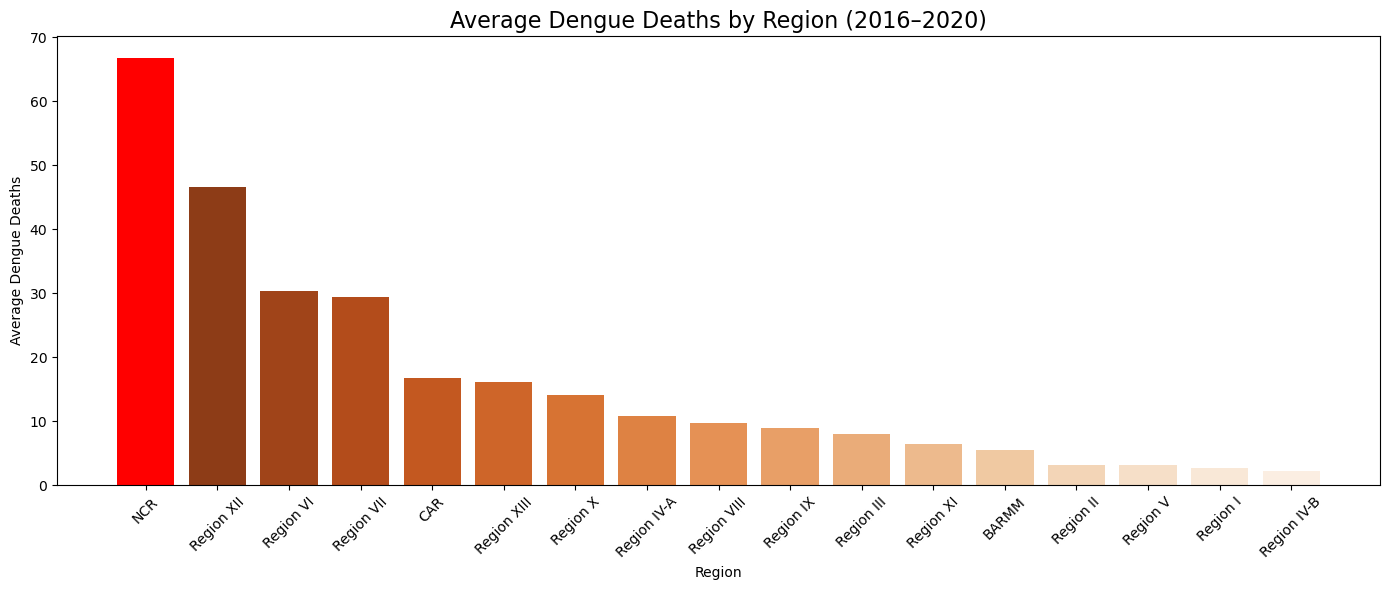

In [31]:
region_avg_deaths = dengue.groupby("Region")["Dengue_Deaths"].mean().sort_values(ascending=False)
region_avg_deaths = region_avg_deaths.reset_index()
plt.figure(figsize=(14, 6))
sns.barplot(data=region_avg_deaths, x="Region", y="Dengue_Deaths", palette="Oranges_r")
top_region = region_avg_deaths.iloc[0]
plt.bar(top_region["Region"], top_region["Dengue_Deaths"], color="red")
plt.title("Average Dengue Deaths by Region (2016–2020)", fontsize=16)
plt.xlabel("Region")
plt.ylabel("Average Dengue Deaths")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()